In [41]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import re
import glob

In [2]:
def read_csv( filename ):
    # The isinstance() function returns True if the specified object is of the specified type, otherwise False.
    if isinstance(filename, pd.DataFrame): 
        return filename  
    dataframe = pd.read_csv( filename, parse_dates=['Date'] )
    
    return dataframe

def getName( filename ):
    return re.sub(r'^.+/|\.[^.]+$', '', filename)

def getCap( filename ):
    return re.sub(r'^.*/(\w+_Cap)/.*$', '\\1', filename)

In [3]:
filenames = glob.glob('/home/deepak/Documents/ML-Intern/*_Cap/*.csv')

portfolio_caps_seen = { getCap(filename): 0 for filename in filenames }
portfolio = pd.DataFrame()
for filename in filenames:

    if  portfolio_caps_seen[ getCap(filename) ] < 10:
        portfolio_caps_seen[ getCap(filename) ] += 1
        portfolio[ getName(filename)] = read_csv(filename)['Close Price']
portfolio.set_index(read_csv(filenames[0])['Date'])
print('portfolio.shape: ', portfolio.shape)
print('portfolio.shape.dropna(): ', portfolio.dropna().shape)
portfolio.head()

portfolio.shape:  (495, 30)
portfolio.shape.dropna():  (270, 30)


,MINDAIND,SONATSOFTW,LEMONTREE,IDFC,LUXIND,VENKEYS,RCOM,SUZLON,RAYMOND,JKLAKSHMI,...,HINDALCO,CIPLA,GAIL,ASIANPAINT,ADANIPORTS,MARUTI,BAJFINANCE,BPCL,AXISBANK,HDFCBANK
0,517.90,162.65,71.65,63.70,819.60,1169.70,32.00,19.6,772.80,510.80,...,198.45,569.00,414.00,1148.05,356.20,6823.90,1332.95,727.85,500.1,1553.40
1,545.60,158.60,66.85,64.25,817.50,1177.00,32.10,19.7,785.00,527.50,...,196.50,565.60,411.40,1142.85,354.50,6953.95,1347.75,733.30,501.5,1583.00
2,560.10,158.25,66.95,63.35,819.80,1188.00,31.95,19.9,783.65,516.20,...,198.85,562.35,408.30,1154.95,348.55,6958.20,1324.80,727.45,502.8,1559.65
3,545.25,157.40,66.40,61.50,820.05,1156.90,31.05,20.0,746.95,478.95,...,194.00,560.10,404.75,1151.35,347.90,6831.05,1314.55,714.90,492.0,1557.15
4,560.80,151.90,67.70,61.15,817.80,1161.65,30.55,20.6,723.10,469.55,...,191.00,564.95,401.05,1123.15,349.45,6790.55,1289.15,702.45,501.7,1600.00


In [4]:
## from module 5 for random weigth
def normalize_weights( weights ):
    for i in range(0,3):
        weights  = np.round( weights, 3 ) 
        weights /= weights.sum()
    return np.asarray(weights)
    
def random_weights():
    weights  = np.random.rand(portfolio.shape[1])
    return normalize_weights( weights )

weights = random_weights()
weights

array([0.03792415, 0.04790419, 0.05189621, 0.03892216, 0.00299401,
       0.01596806, 0.01097804, 0.03992016, 0.03892216, 0.06087824,
       0.03093812, 0.03093812, 0.05189621, 0.00798403, 0.05888224,
       0.02694611, 0.0499002 , 0.00199601, 0.00998004, 0.02794411,
       0.00998004, 0.03293413, 0.0508982 , 0.000998  , 0.0489022 ,
       0.05788423, 0.03193613, 0.03592814, 0.05888224, 0.02794411])

In [5]:
## working_days_per_year    = 252
portfolio_summary = pd.DataFrame()
portfolio_summary['returns']    = portfolio.pct_change().mean() * 252
portfolio_summary['volatility'] = portfolio.pct_change().std()  * np.sqrt(252)
portfolio_summary

,returns,volatility
MINDAIND,0.081264,0.607379
SONATSOFTW,0.455334,0.401531
LEMONTREE,0.030927,0.289258
IDFC,-0.244936,0.359064
LUXIND,0.254644,0.335070
VENKEYS,0.380938,0.626748
RCOM,-0.879944,0.984369
SUZLON,-0.467204,0.592955
RAYMOND,0.069879,0.363465
JKLAKSHMI,-0.168523,0.279385


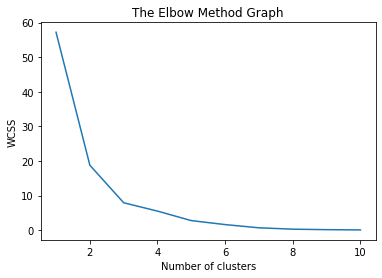

In [72]:
## 6.3
## Within-Cluster-Sum-of-Squares (WSS)
#Using the elbow method to find out the optimal number of #clusters. 
wcss=[]

for i in range(1,11): 
    kmeans = KMeans(n_clusters=i, init ='k-means++', max_iter=300,  n_init=10,random_state=0)
    kmeans.fit(portfolio_summary)

#kmeans algorithm fits to the X dataset

    wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.title('The Elbow Method Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [43]:
optimal_cluster = 5

[1.6454414509462798]

In [75]:
#5 According to the Elbow graph we deterrmine the clusters number as 
#5. Applying k-means algorithm to the dataset.

kmeans = sklearn.cluster.KMeans(n_clusters=5, init ='k-means++', max_iter=300, n_init=10,random_state=0 )

# We are going to use the fit predict method that returns for each #observation which cluster it belongs to. 
# The cluster to which #client belongs and it will return this cluster numbers into a #single vector that is  called y K-means
# kmeans.fit(portfolio_summary)
y_kmeans = kmeans.fit_predict(portfolio_summary)
# cluster_labels = kmeans.labels_


In [85]:
# cluster_labels
y_kmeans

array([1, 3, 2, 1, 2, 0, 4, 3, 2, 0, 0, 1, 0, 2, 0, 0, 3, 1, 4, 1, 2, 4,
       2, 4, 2, 4, 3, 1, 2, 2], dtype=int32)

In [46]:
portfolio_summary['Cluster'] = y_kmeans

In [79]:
portfolio_summary

,returns,volatility,Cluster
MINDAIND,0.081264,0.607379,3
SONATSOFTW,0.455334,0.401531,1
LEMONTREE,0.030927,0.289258,2
IDFC,-0.244936,0.359064,3
LUXIND,0.254644,0.335070,2
VENKEYS,0.380938,0.626748,0
RCOM,-0.879944,0.984369,4
SUZLON,-0.467204,0.592955,1
RAYMOND,0.069879,0.363465,2
JKLAKSHMI,-0.168523,0.279385,0


In [132]:
X = portfolio_summary


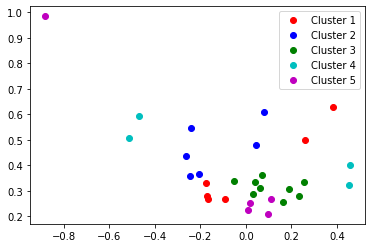

In [131]:
#6.4 Visualising the clusters

plt.plot(X[y_kmeans==0]['returns'], X[y_kmeans==0]['volatility'], 'ro', label ='Cluster 1')
plt.plot(X[y_kmeans==1]['returns'], X[y_kmeans==1]['volatility'], 'bo', label ='Cluster 2')
plt.plot(X[y_kmeans==2]['returns'], X[y_kmeans==2]['volatility'], 'go', label ='Cluster 3')
plt.plot(X[y_kmeans==3]['returns'], X[y_kmeans==3]['volatility'], 'co', label ='Cluster 4')
plt.plot(X[y_kmeans==4]['returns'], X[y_kmeans==4]['volatility'], 'mo', label ='Cluster 5')

plt.legend(loc= 'upper right')
plt.show()
